In [1]:
from matplotlib import pyplot as plt
import numpy as np
import h5py
def plot_labels(labels):
    n_columns = labels.shape[1]  # Number of columns in labels
    fig, axes = plt.subplots(2, 3, figsize=(15, 5))  # Adjust figsize as needed
    axes =axes.ravel()
    
    widths = [0.05, 0.05, 0.05, 0.04, 0.1, 1]
    for i in range(n_columns):
        values, counts = np.unique(labels[:, i], return_counts=True)
        axes[i].bar(values, counts, width=widths[i])
        str_values = [round(v,2) for v in values][:10]
        axes[i].set_title(f"{_FACTORS_IN_ORDER[i]} - {str_values}")
        #$print(f"Unique values for {_FACTORS_IN_ORDER[i]}: {values} {counts}")
        axes[i].set_xticks(values)  # Set ticks to unique values in the data
        axes[i].set_xticklabels([str(round(val,2)) for val in values], rotation=45)  # Rotate labels if needed
      
    plt.tight_layout()
    plt.show()#np.array(labels).shape


## Pasos
La diferencia entre el dataset de train y test es que dataset de train tiene formas [0,1] y el de test sólo tiene formas [2,3].
Archivos están en formato h5:
    * 3dshapes_abstraction_train.h5
    * 3dshapes_abstraction_test.h5
  
Código de cómo cargar el dataset de ejemplo se puede ver en un notebook en: https://github.com/google-deepmind/3d-shapes



### Metadata del dataset


In [2]:
_FACTORS_IN_ORDER = ['floor_hue', 'wall_hue', 'object_hue', 'scale', 'shape',
                     'orientation']
_NUM_VALUES_PER_FACTOR = {'floor_hue': 10, 'wall_hue': 10, 'object_hue': 10, 
                          'scale': 8, 'shape': 4, 'orientation': 15}

#### Split entrenamiento

<KeysViewHDF5 ['images', 'labels']>


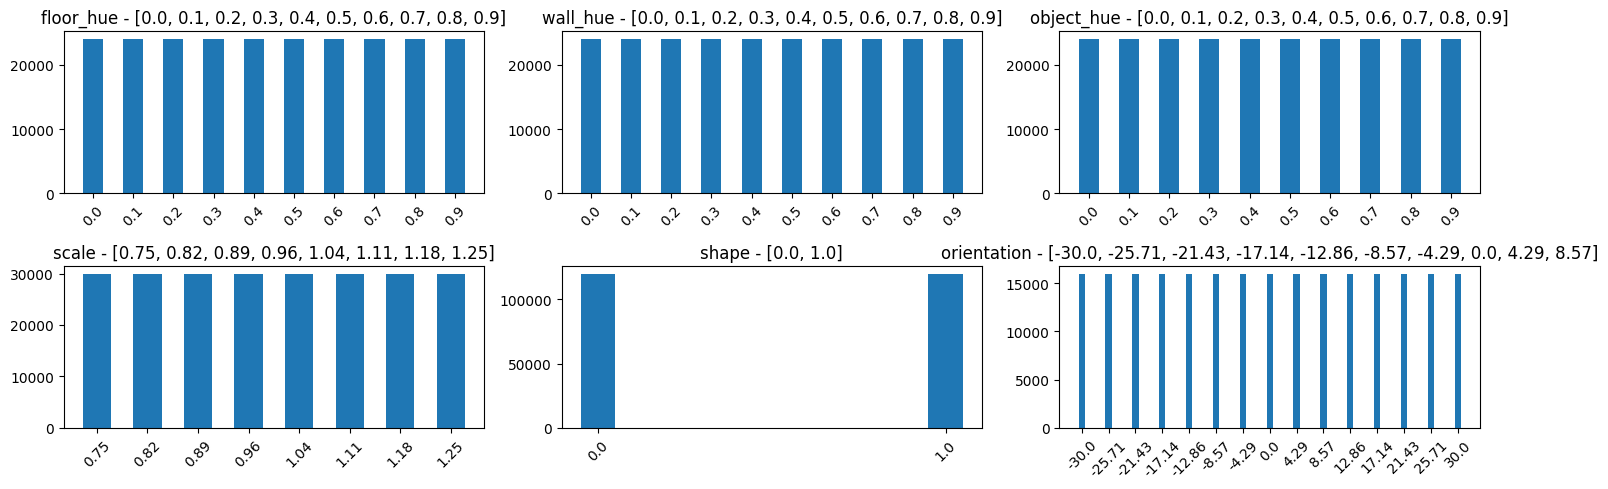

In [8]:
from os.path import join
root = "/mnt/nas2/GrimaRepo/araymond/3dshapes"
dataset = h5py.File(join(root,'3dshapes_abstraction_train.h5'), 'r')
print(dataset.keys())
images = dataset['images']  # array shape [480000,64,64,3], uint8 in range(256)
labels = dataset['labels']  # array shape [480000,6], float64
images = np.transpose(images, (0,3,1,2))
image_shape = images.shape[1:]  # [64,64,3]
label_shape = labels.shape[1:]  # [6]
n_samples = labels.shape[0]  # 10*10*10*8*4*15=480000
plot_labels(np.array(labels))

In [10]:
images.shape

(240000, 3, 64, 64)

In [11]:
np.savez(join(root, "shapes3d_abstraction_train_images.npz"), np.array(images))
np.savez(join(root, "shapes3d_abstraction_train_labels.npz"), np.array(labels))

#### Split test

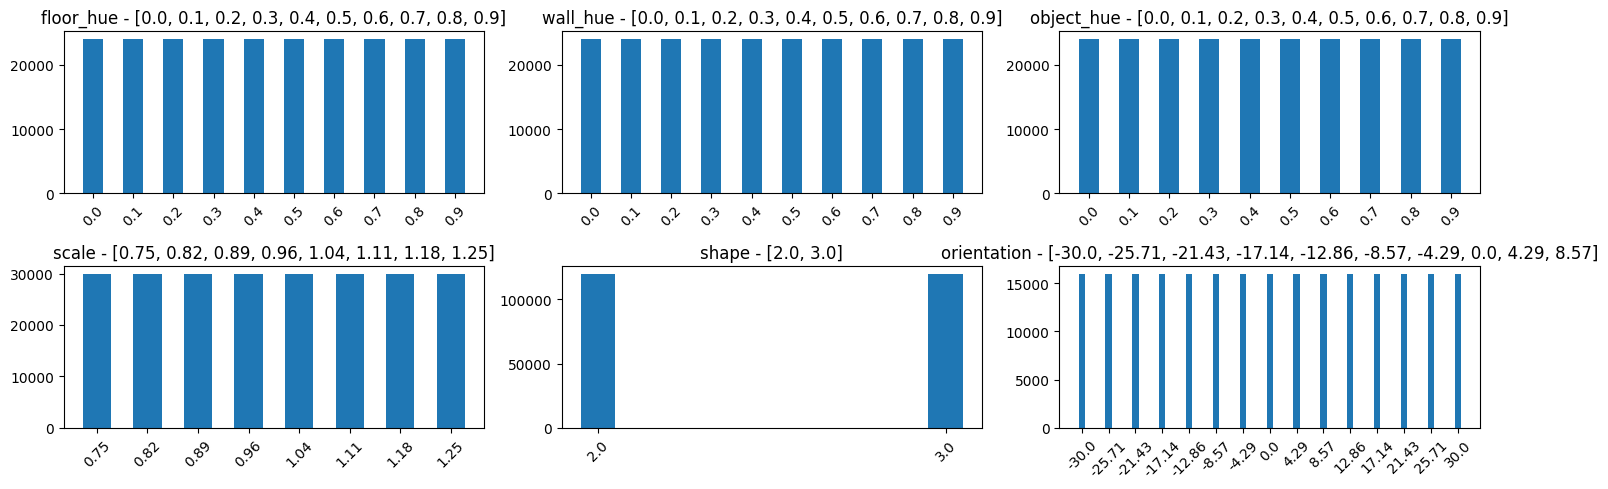

In [12]:
dataset = h5py.File(join(root,'3dshapes_abstraction_test.h5'), 'r')
images = dataset['images']  # array shape [480000,64,64,3], uint8 in range(256)
images = np.transpose(images, (0,3,1,2))
labels = dataset['labels']  # array shape [480000,6], float64
image_shape = images.shape[1:]  # [64,64,3]
label_shape = labels.shape[1:]  # [6]
n_samples = labels.shape[0]  # 10*10*10*8*4*15=480000
plot_labels(np.array(labels))


In [13]:
np.savez(join(root, "shapes3d_abstraction_test_images.npz"), np.array(images))
np.savez(join(root, "shapes3d_abstraction_test_labels.npz"), np.array(labels))

In [2]:
from models import PairVisionTransformer
model = PairVisionTransformer(
    image_size=64,
    patch_size=8,
    num_layers=4,
    num_heads=12,
    hidden_dim=384,
    mlp_dim=128,
    num_classes=2
)

/home/araymond/storage/pyenv/versions/3.10.14/envs/mini/lib/python3.10/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [3]:
import torch
data = torch.randn(2, 3, 128, 64)

model(data)

torch.Size([2, 384, 16, 8])
2 384 16 8
torch.Size([2, 129, 384])
tensor([[[-0.8020,  0.3727,  0.0843,  ..., -0.1237,  0.4553,  1.2583],
         [-0.5632,  0.5330,  0.4799,  ...,  0.2334,  0.9157,  0.5570],
         [-0.2978,  0.5411, -0.3046,  ...,  1.1528, -0.7119, -1.3317],
         ...,
         [ 0.0457,  1.3979,  0.9379,  ...,  0.1025,  0.1015,  0.7033],
         [-0.2000,  0.0968, -1.7392,  ..., -0.5398,  0.4948,  1.5437],
         [-1.4952,  1.0248,  0.4628,  ..., -1.4619, -0.1208, -1.5059]],

        [[-0.9360, -0.1326, -1.7896,  ...,  0.8447,  0.5531,  0.5285],
         [-0.7256,  0.8937, -1.0769,  ...,  1.3640,  0.8993,  1.3619],
         [-1.6153, -1.8491,  0.9241,  ..., -0.0457, -0.3549,  0.2711],
         ...,
         [-0.1336,  0.5801,  0.4113,  ...,  1.0912,  0.0086,  1.9027],
         [ 0.6899,  0.4712, -0.7507,  ..., -0.0643,  0.8690,  0.3916],
         [-0.9323, -0.6865, -1.6047,  ...,  0.7997, -1.2111,  0.6430]]],
       grad_fn=<NativeLayerNormBackward0>)
tensor([

tensor([[0., 0.],
        [0., 0.]], grad_fn=<AddmmBackward0>)

In [6]:
import numpy as np
array = np.array([[0, 1, 2],[3, 4, 5]])
print(array.shape)
# Calculate the mean and standard deviation for each row (axis=1)
mean = np.mean(array, axis=0, keepdims=True)
std = np.std(array, axis=0, keepdims=True)
print(mean.shape)
# Normalize the array along rows
normalized_array = (array - mean) / std
normalized_array.shape

(2, 3)
(1, 3)


(2, 3)